# Student Performance Dataset, retirado do Kaggle 📖
https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset

Dataset com 1 milhão de linhas, contendo como colunas a identificação do estudante, as horas semanais de estudo, a frequência, a participação em aula, um score total baseado nas horas de estudo e a nota final derivada do score total

In [2]:
!pip install matplotlib -q
!pip install numpy -q
!pip install seaborn -q
!pip install pandas -q

In [3]:
#Versão do Python
from platform import python_version
print(f'Versão do Python: {python_version()}')

Versão do Python: 3.12.11


In [4]:
#verificar funcionamento do python
print ("Bye bye, world")

Bye bye, world


# 1. Importando as bibliotecas básicas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregando e exibindo o dataset

In [6]:
url = "https://github.com/FilipeCamello/lia1_2025_2/blob/main/Aula%2012%20-%20Student%20Performance%20Dataset/student_performance.csv?raw=true"
df_dataset = pd.read_csv(url, sep=',', index_col = None)
print ("Dataset importado com sucesso")
display (df_dataset)

Dataset importado com sucesso


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A


# 3 - Pré-processamento

## 3.1 - Eliminar atributos irrelevantes
No nosso caso, apenas o student_id é um atributo irrelevante

In [7]:
df_dataset = df_dataset.drop(columns = ['student_id'])

display (df_dataset.head())

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,18.5,95.6,3.8,97.9,A
1,14.0,80.0,2.5,83.9,B
2,19.5,86.3,5.3,100.0,A
3,25.7,70.2,7.0,100.0,A
4,13.4,81.9,6.9,92.0,A


## 3.2 - Tratamento de valores ausentes

In [8]:
#Índice de linhas com valores ausentes
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()

#Mostrar linhas com valores ausentes
display (df_dataset.iloc[idxRowNan])

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade


Como o Dataset não possui valores nulos, não precisamos fazer o tratamento de dados faltantes

## 3.3 Tratamento de dados redundantes

In [9]:
df_duplicates = df_dataset [df_dataset.duplicated()]
display (df_duplicates)

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
2404,26.7,100.0,6.0,100.0,A
7235,24.0,100.0,7.5,100.0,A
9126,19.0,85.9,8.0,100.0,A
10446,20.4,77.6,5.3,100.0,A
13282,15.9,89.4,5.6,100.0,A
...,...,...,...,...,...
999948,23.0,64.4,6.1,100.0,A
999956,22.0,82.5,2.6,100.0,A
999973,21.1,85.7,4.9,100.0,A
999987,24.3,79.6,8.2,100.0,A


17 mil objetos duplicados. Parece muitas linhas, porém temos 1 milhão de registros!!!. Lembrando que, como temos muitos valores possíveis, talvez tenhamos diversas duplicatas de diferentes valores. Podemos apagar as duplicatas e manter apenas um dos objetos.

In [10]:
def delDuplicatas( df_dataset ):

    # remove o(s) objeto(s) duplicado(s), mantendo apenas a primeira ocorrência
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df_dataset = delDuplicatas(df_dataset)

#Verificando se os valores foram realmente apagados
df_duplicates = df_dataset [df_dataset.duplicated()]
display (df_duplicates)


,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade


## 3.4 Tratamento de dados inconsistentes

Não temos porque tratar dados inconsistentes nesse dataset. Alunos com horas de estudo, frequência, participação e scores diferentes podem tirar notas iguais, bem como alunos com todos esses scores iguais podem tirar notas diferentes. Portanto, pela questão do tipo de dado que estamos trabalhando, não existe necessidade de tratar inconsistências, afinal, sem sequer são inconsistências de fato

# 4. Análise dos dados

In [11]:
df_detalhes = df_dataset.describe()
display (df_detalhes)

,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,982132.000000,982132.000000,982132.000000,982132.000000
mean,14.904512,84.572068,5.982179,84.008196
std,6.880515,9.374756,1.961750,15.426172
min,0.000000,50.000000,0.000000,9.400000
25%,10.200000,78.200000,4.600000,73.600000
50%,14.800000,84.900000,6.000000,87.000000
75%,19.500000,91.600000,7.400000,100.000000
max,40.000000,100.000000,10.000000,100.000000


## 4.1 Detecção de Outliers

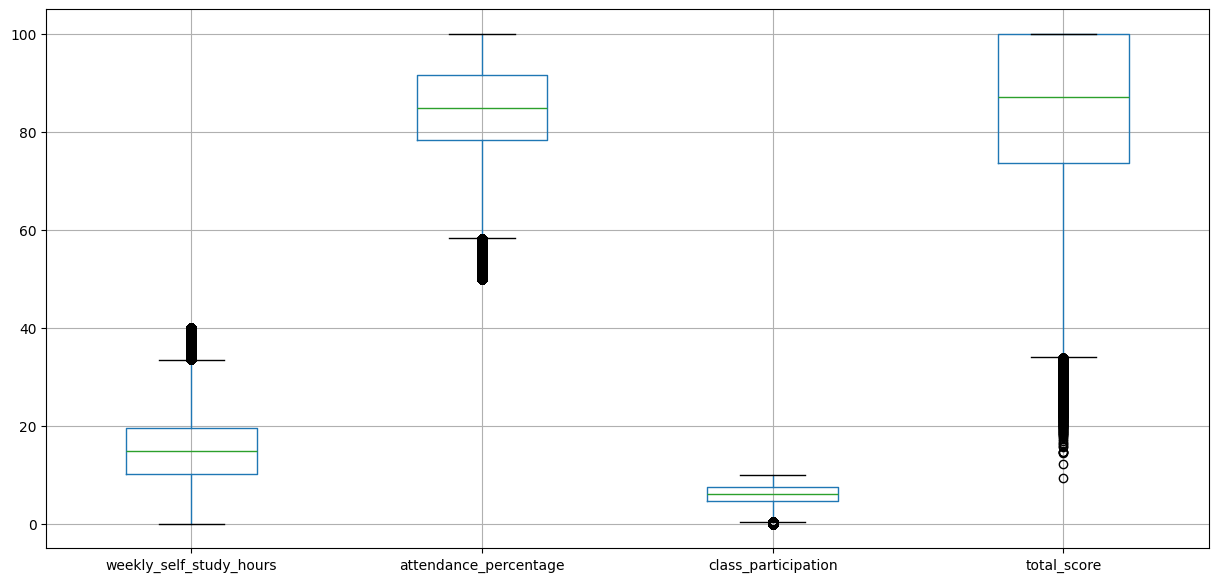

In [12]:
# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

Podemos fazer uma análise interessante dos outliers, temos que os outliers em horas de estudos são em um nível superior, ou seja, poucos estudantes estudam um tempo acima da média, porém todos os outros outliers são em um nível inferior, ou seja, poucos tem uma nota, frequência ou participação muito abaixo da média.
Agora podemos eliminar os outliers baseado nos próprios quartis

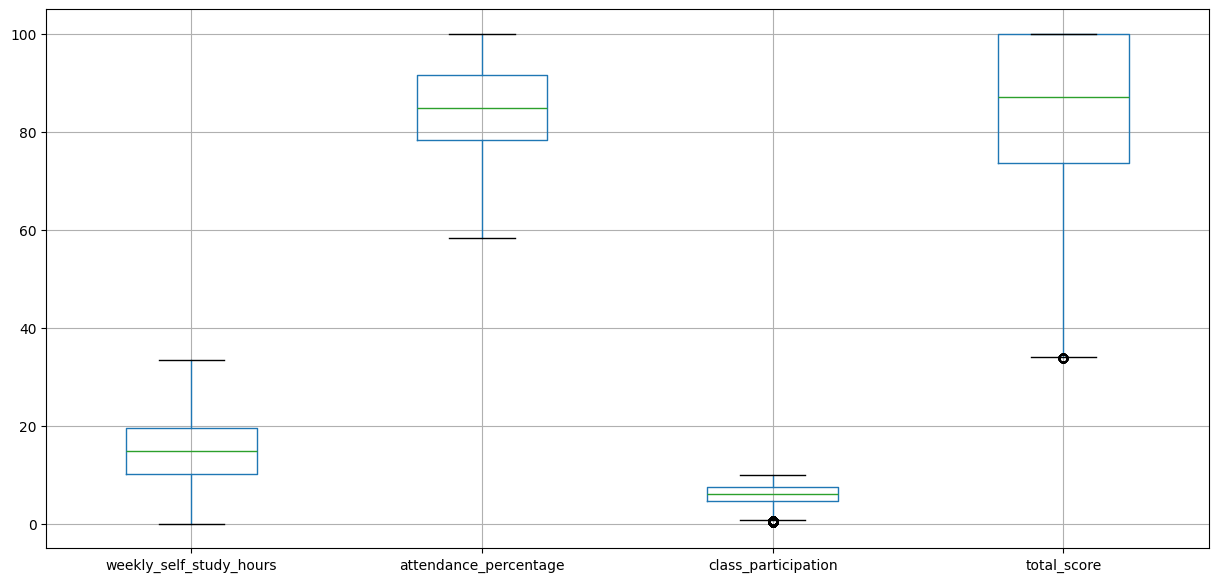

In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Exemplo de uso
df_dataset = remove_outliers_iqr(df_dataset, 'weekly_self_study_hours')
df_dataset = remove_outliers_iqr(df_dataset, 'attendance_percentage')
df_dataset = remove_outliers_iqr(df_dataset, 'class_participation')
df_dataset = remove_outliers_iqr(df_dataset, 'total_score')

# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

Apesar dos valores fronteiriços, temos os outliers limpos, agora podemos aplicar um modelo de Machine Learning

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
38820/38820 ━━━━━━━━━━━━━━━━━━━━ 134s 3ms/step - loss: 268.6040 - mae: 9.8305 - val_loss: 16.8733 - val_mae: 3.4141
Epoch 2/3
38820/38820 ━━━━━━━━━━━━━━━━━━━━ 146s 4ms/step - loss: 18.4661 - mae: 3.5511 - val_loss: 17.1584 - val_mae: 3.3714
Epoch 3/3
38820/38820 ━━━━━━━━━━━━━━━━━━━━ 122s 3ms/step - loss: 16.7612 - mae: 3.3317 - val_loss: 17.7163 - val_mae: 3.4493
6066/6066 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step

Desempenho do Modelo:
Erro Quadrático Médio (MSE): 17.74
Erro Absoluto Médio (MAE): 3.45
Coeficiente de Determinação (R²): 0.9243


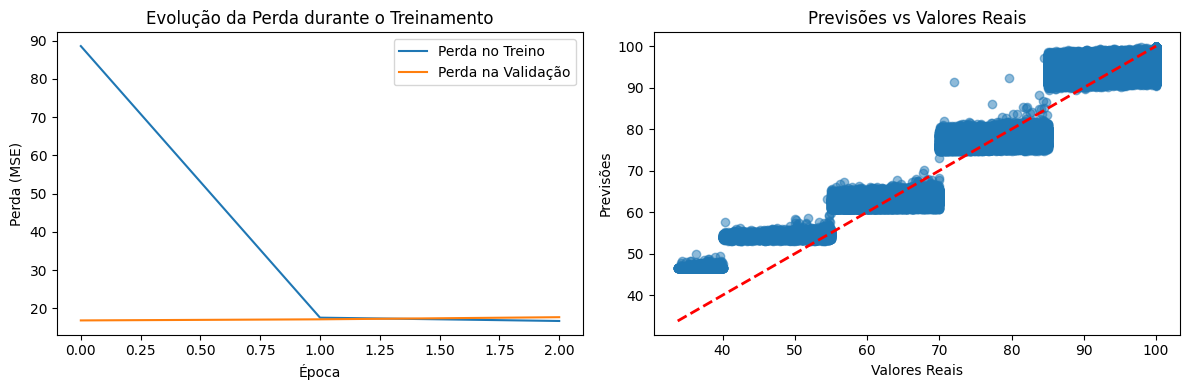


Exemplos de Previsões:


,Real,Predito,Diferença
0,100.0,99.112610,0.887390
1,82.5,77.416138,5.083862
2,88.6,92.285698,3.685698
3,93.1,93.777443,0.677443
4,98.9,95.513206,3.386794
5,60.4,61.818493,1.418493
6,86.8,94.633301,7.833301
7,63.6,64.299698,0.699698
8,89.1,97.826080,8.726080
9,79.9,76.100021,3.799979


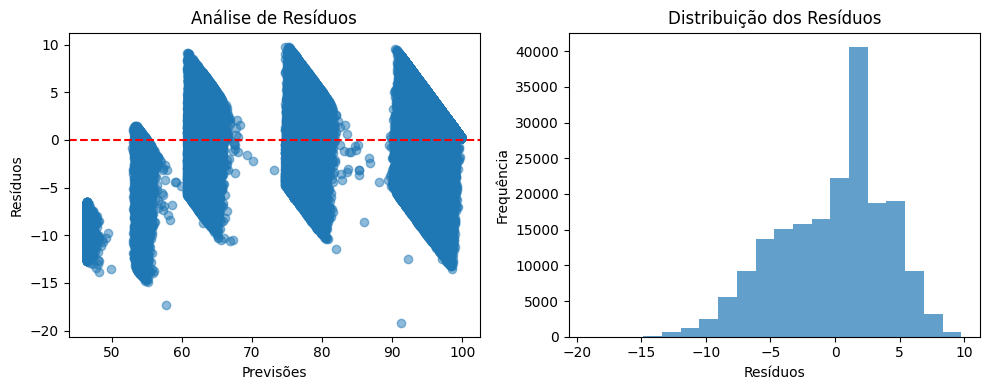

In [17]:
# Dividir os dados em features (X) e target (y)
X = df_dataset.drop('total_score', axis=1)
y = df_dataset['total_score']

# Codificar variáveis categóricas usando Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Dividir em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (importante para redes neurais)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir uma rede neural simples
from tensorflow import keras
from tensorflow.keras import layers

# Definir a arquitetura do modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Camada de saída para regressão
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Resumo do modelo
model.summary()

# Treinar o modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=3,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Fazer previsões
y_pred = model.predict(X_test_scaled).flatten()

# Avaliar o modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDesempenho do Modelo:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Visualizar a perda durante o treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda no Treino')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Evolução da Perda durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()

# Visualizar previsões vs valores reais
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')

plt.tight_layout()
plt.show()

# Mostrar algumas previsões de exemplo
results = pd.DataFrame({
    'Real': y_test.values,
    'Predito': y_pred,
    'Diferença': abs(y_test.values - y_pred)
}).head(10)

print("\nExemplos de Previsões:")
display(results)

# Análise de resíduos
residuals = y_test - y_pred

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

plt.tight_layout()
plt.show()